# Analysis of Variance (ANOVA)


- Below table lists the total sales for 10 days, when the brand was stocked in shelves at different heights.
- A retailer wants to understand shelving height impacts on sales. 
- Check whether the sales of a particular brand change significantly if they are placed at eye level, or at lower levels or higher levels?

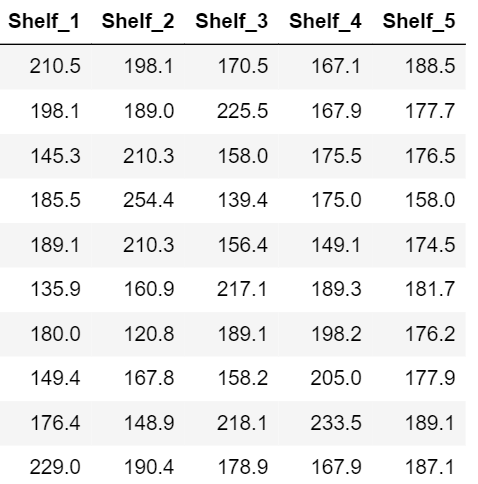

In [1]:
# import the required packages
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns  
import numpy as np  
import pandas.tseries  
plt.style.use('fivethirtyeight')  

In [2]:
data = pd.read_csv('Shelfs.csv',encoding='latin1') 

In [3]:
data

,Shelf_1,Shelf_2,Shelf_3,Shelf_4,Shelf_5
0,210.5,198.1,170.5,167.1,188.5
1,198.1,189.0,225.5,167.9,177.7
2,145.3,210.3,158.0,175.5,176.5
3,185.5,254.4,139.4,175.0,158.0
4,189.1,210.3,156.4,149.1,174.5
5,135.9,160.9,217.1,189.3,181.7
6,180.0,120.8,189.1,198.2,176.2
7,149.4,167.8,158.2,205.0,177.9
8,176.4,148.9,218.1,233.5,189.1
9,229.0,190.4,178.9,167.9,187.1


In [4]:
print('The total number of rows in the dataset:', data.size)  

The total number of rows in the dataset: 50


In [5]:
# Computing the average     
d1=list(data.Shelf_1)
d2=list(data.Shelf_2)
d3=list(data.Shelf_3)
d4=list(data.Shelf_4)
d5=list(data.Shelf_5)

m1=np.mean(d1)
m2=np.mean(d2)
m3=np.mean(d3)
m4=np.mean(d4)
m5=np.mean(d5)

print('Average sales in Shelf_1: {}'.format(m1))
print('Average sales in Shelf_2: {}'.format(m2))
print('Average sales in Shelf_3: {}'.format(m3))
print('Average sales in Shelf_4: {}'.format(m4))
print('Average sales in Shelf_5: {}'.format(m5))



Average sales in Shelf_1: 179.92000000000002
Average sales in Shelf_2: 185.09000000000003
Average sales in Shelf_3: 181.11999999999998
Average sales in Shelf_4: 182.85
Average sales in Shelf_5: 178.71999999999997


- Computing the overall mean k is the number of groups (Shelfs), k=5

In [6]:
m=(m1+m2+m3+m4+m5)/5
print('Overall mean: {}'.format(m))

Overall mean: 181.54000000000002


In [7]:
SSb=10*((m1-m)**2+(m2-m)**2+(m3-m)**2+(m4-m)**2+(m5-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 250.71800000000343


In [8]:
MSb=SSb/4
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 62.67950000000086


In [9]:
err_d1=list(d1-m1)
err_d2=list(d2-m2)
err_d3=list(d3-m3)
err_d4=list(d4-m4)
err_d5=list(d5-m5)
err=err_d1+err_d2+err_d3+err_d4+err_d5
ssw=[]
for i in err:
    ssw.append(i**2)
    
SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 34735.022


In [10]:
MSw=SSw/(5*9)
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 771.8893777777777


In [11]:
F=MSb/MSw
print('F-score: {}'.format(F))

F-score: 0.08120269795712348


# one-way ANOVA
- A one-way ANOVA is used to determine whether or not the means of independent groups are equal
- A one-way ANOVA uses the following null and alternative hypotheses:
- Null Hypothesis(H0): All group means are equal
- Alternative Hypothesis (HA): At least one group mean is different from the rest  


- Between Group Variation: The total variation between each group mean and the overall mean.
- Within-Group Variation: The total variation in the individual values in each group and their group mean.
- If the Between group variation is high relative to the Within-group variation,
- then the F-statistic of the ANOVA will be higher and the corresponding p-value will be lower,
- which makes it more likely that we will reject the null hypothesis that the group means are equal

In [12]:
# one-way ANOVA
from scipy.stats import f_oneway
print("Anova result: The F statistis and P value")
print(f_oneway(d1,d2,d3,d4,d5))

Anova result: The F statistis and P value
F_onewayResult(statistic=0.08120269795712254, pvalue=0.9877433888641692)


- We fail to reject the null  hypothesis: 
- the variation we see is  simply due to random  chance, 
- and therefore we  cannot conclude that shelf  height has any impact on  sales

# Two-way ANOVA

- User is interested in understanding the impact of both shelf level as well as aisle placement on sales for Brand A
- That is, not only the height of the product placed, but also other brands /  categories that the product is placed in are hypothesized to have an  impact on Brand A sales
- A Two-Way ANOVA is useful when we desire to compare the effect of multiple levels of two factors and we have multiple observations at each level

- Is there a difference in energy expended (calories  burned) based on stretching before exercise and weights during exercise?
- Factors (IVs) – 2: Pre Stretch and Ankle Weights

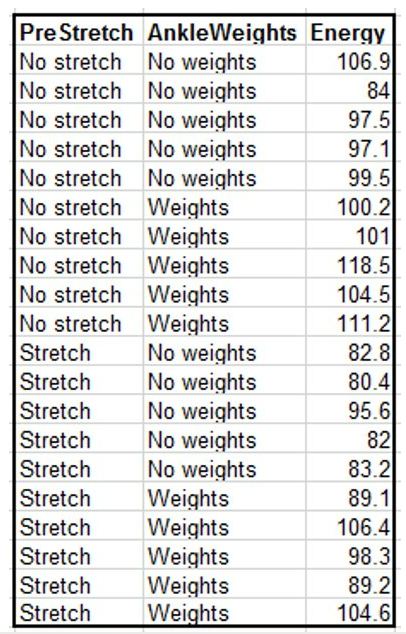

In [13]:
data = pd.read_csv('Calorie.csv', encoding='latin1') 

In [14]:
data

,PreStretch,AnkleWeights,Energy
0,NoStretch,NoWeights,106.9
1,NoStretch,NoWeights,84.0
2,NoStretch,NoWeights,97.5
3,NoStretch,NoWeights,97.1
4,NoStretch,NoWeights,99.5
5,NoStretch,Weights,100.2
6,NoStretch,Weights,101.0
7,NoStretch,Weights,118.5
8,NoStretch,Weights,104.5
9,NoStretch,Weights,111.2


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'Energy ~ C(PreStretch) + C(AnkleWeights) + C(PreStretch):C(AnkleWeights)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                                sum_sq    df          F    PR(>F)
C(PreStretch)                  591.872   1.0  10.161154  0.005724
C(AnkleWeights)                649.800   1.0  11.155652  0.004154
C(PreStretch):C(AnkleWeights)    8.712   1.0   0.149566  0.704045
Residual                       931.976  16.0        NaN       NaN


- PreStretch: p-value = 0.005724
- AnkleWeights: p-value = 0.004154
- Energy: p-value = 0.704045

# Post Hoc Test

- The null hypothesis is tested using the F test for all groups
- post-hoc test is used to check the individual group differences

# Course Scores Case Study 

In [16]:
# Data frame of scores in three different courses
C1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
C2 = [91, 92, 93, 90, 97, 94, 82, 88, 95, 96]
C3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

#perform one-way ANOVA
f_oneway(C1,C2,C3)

F_onewayResult(statistic=5.167774552944481, pvalue=0.012582197136592605)

- p-value from the ANOVA table is 0.01258 which is less than 0.05
- Hence sufficient evidence is there to say that the mean values across each group are not equal.
- Thus, can proceed to perform Tukey’s Test to determine exactly which group means are different.

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#create DataFrame to hold data
df = pd.DataFrame({'score': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80,
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'group': np.repeat(['C1', 'C2', 'C3'], repeats=10)}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    C1     C2      8.4 0.0159   1.4259 15.3741   True
    C1     C3      1.3 0.8894  -5.6741  8.2741  False
    C2     C3     -7.1 0.0454 -14.0741 -0.1259   True
-----------------------------------------------------


- P-value for the difference in means between C1 and C2: .0159
- P-value for the difference in means between C1 and C3: .8864
- P-value for the difference in means between C2 and C3: .0454
    
- There is a statistically significant difference between the means of groups C1 and C2 groups C2 and C3. 
- but not a statistically significant difference between the means of groups C1 and C3.

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#create DataFrame to hold data
df = pd.DataFrame({'sales': [210.5, 198.1, 145.3, 185.5, 189.1, 135.9, 180.0, 149.4, 176.4, 229.0,
                            198.1, 189.0, 210.3, 254.4, 210.3, 160.9, 120.8, 167.8, 148.9, 190.4,
                            170.5, 225.5, 158.0, 139.4, 156.4, 217.1, 189.1, 158.2, 218.1, 178.9,
                            167.1, 167.9, 175.5, 175.0, 149.1, 189.3, 198.2, 205.0, 233.5, 167.9,
                            188.5, 177.7, 176.5, 158.0, 174.5, 181.7, 176.2, 177.9, 189.1, 187.1],
                   'group': np.repeat(['d1', 'd2', 'd3', 'd4', 'd5'], repeats=10)}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['sales'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    d1     d2     5.17 0.9935 -30.1347 40.4747  False
    d1     d3      1.2    1.0 -34.1047 36.5047  False
    d1     d4     2.93 0.9993 -32.3747 38.2347  False
    d1     d5     -1.2    1.0 -36.5047 34.1047  False
    d2     d3    -3.97 0.9977 -39.2747 31.3347  False
    d2     d4    -2.24 0.9998 -37.5447 33.0647  False
    d2     d5    -6.37 0.9857 -41.6747 28.9347  False
    d3     d4     1.73 0.9999 -33.5747 37.0347  False
    d3     d5     -2.4 0.9997 -37.7047 32.9047  False
    d4     d5    -4.13 0.9973 -39.4347 31.1747  False
-----------------------------------------------------
